In [289]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing,cross_validation
from sklearn import linear_model

from subprocess import check_output
##print(check_output(["ls", "../input"]).decode("cp1252"))

# Input data files are available in the "../input/" directory.
delivery_data=pd.read_csv("ipl2018.csv")
match_data=pd.read_csv("match2018.csv")

#delivery_data



In [290]:
player_team="Royal Challengers Bangalore"
name='V Kohli'

#extracting batsman_data 
batsman_data=delivery_data[delivery_data.batsman==name]

#creating a dataframe containing names of all team except player's own team
teams=pd.DataFrame(index=match_data.team1.unique())
teams=teams.drop('Royal Challengers Bangalore')
teams
#batsman_data.iloc[0:93]
batsman_data.batsman_runs.sum()

4962

In [291]:
data=match_data[match_data.team1==player_team]
batting_first=list()
for team in teams.index:
    for venue in data.venue.unique():
        matches=data[(data.venue==venue)&(data.team2==team)].id
        runs=0
        balls=0
        for match in matches:
            runs=0
            balls=0
            t=batsman_data[batsman_data.match_id==match].batsman_runs.sum()
            runs=runs+t
            balls=balls+len(batsman_data[(batsman_data.match_id==match)&(batsman_data.wide_runs==0)&(batsman_data.noball_runs==0)])
            batting_first=batting_first+[[team,venue,1,balls,runs]]

#taking data where batted second
data=match_data[match_data.team2==player_team]
batting_second=list()
for team in teams.index:
    for venue in data.venue.unique():
        matches=data[(data.venue==venue)&(data.team1==team)].id
        runs=0
        balls=0
        for match in matches:
            runs=0
            balls=0
            t=batsman_data[batsman_data.match_id==match].batsman_runs.sum()
            runs=runs+t
            balls=balls+len(batsman_data[(batsman_data.match_id==match)&(batsman_data.wide_runs==0)&(batsman_data.noball_runs==0)])
            batting_second=batting_second+[[team,venue,0,balls,runs]]
        
#merging the two data sets
batting_first=batting_first+batting_second
df=pd.DataFrame(data=batting_first,columns=['team','venue','batting_first','balls','runs'])

#df=df[df.runs!=0]
df.runs.sum()
datatoss = df.drop(['batting_first','balls'],axis = 1) 
datatoss.runs.sum()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.scatter(datatoss.team,datatoss.runs)
datatoss.runs.sum()
bin = [-1,30,60,200]
category = pd.cut(datatoss.runs,bin)
category = category.to_frame()
category
category.columns = ['range1']
#concatenate age and its bin
df_new = pd.concat([datatoss,category],axis = 1)
#ddd = df_new.range1.to_string()
#range1 = {'NaN':0}
#df_new['range1'] = [range1[item] for item in df_new['range1']] 
datatoss.runs.sum()
delivery_data.sort_values(by='batsman_runs', ascending=False)
df_new.sort_values(by='runs', ascending=False)
import matplotlib.pyplot as plt
%matplotlib inline
dffin = df_new['range1'].apply(str)

range1 = {'(-1, 30]':0,'(30, 60]':1,'(60, 200]':2}
dffin = [range1[item] for item in dffin] 
#df_new1 = df_new.drop(['venue','runs'],axis = 1)
#plt.scatter(df_new1.team,df_new1.range1)
dffin = pd.DataFrame(dffin,columns=['range'])
df_final = pd.concat([df_new,dffin],axis = 1)
df_final = df_final.drop(columns=['runs','range1'],axis = 1)
#plt.scatter(df_final.team,df_final.range)
df_final

,team,venue,range
0,Sunrisers Hyderabad,M Chinnaswamy Stadium,1
1,Sunrisers Hyderabad,M Chinnaswamy Stadium,2
2,Sunrisers Hyderabad,M Chinnaswamy Stadium,0
3,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1
4,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",2
5,Mumbai Indians,M Chinnaswamy Stadium,2
6,Mumbai Indians,M Chinnaswamy Stadium,0
7,Mumbai Indians,M Chinnaswamy Stadium,0
8,Mumbai Indians,M Chinnaswamy Stadium,0
9,Mumbai Indians,M Chinnaswamy Stadium,0


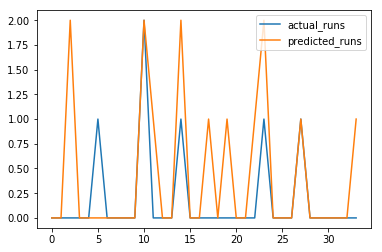

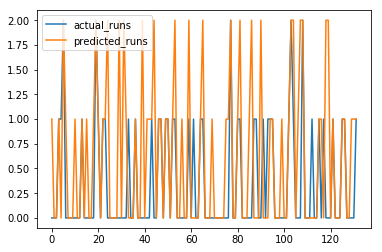

train accuracy
0.681818181818
test accuracy
0.735294117647


In [296]:
processed_df = df_final.copy()
le = preprocessing.LabelEncoder()
processed_df.team = le.fit_transform(processed_df.team)
processed_df.venue = le.fit_transform(processed_df.venue)

X = processed_df.drop(['range'], axis=1).values
y = processed_df['range'].values

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
svm = svm.SVC()
rfr = RandomForestClassifier(n_estimators = 200, max_depth =25)
dr = DecisionTreeClassifier(max_depth =10)
reg=linear_model.LinearRegression()
rfr.fit(X_train,y_train)
plt.plot(rfr.predict(X_test))
pr = rfr.predict(X_test)
plt.plot(y_test)
plt.legend(['actual_runs','predicted_runs'])
plt.show()
plt.plot(rfr.predict(X_train))
prt = rfr.predict(X_train)
plt.plot(y_train)
plt.legend(['actual_runs','predicted_runs'])
plt.show()
from sklearn.metrics import accuracy_score
#score = accuracy_score(y_test,pr)
#train_score = accuracy_score(y_train,X_train)
score = accuracy_score(y_test,pr)
train_score = accuracy_score(y_train,prt)
print('train accuracy')
print(train_score)
print('test accuracy')
print(score)

In [297]:
pr

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [298]:
y_test

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [246]:
player_team="Mumbai Indians"
name='SL Malinga'

#extracting bowler_data
bowler_data=delivery_data[delivery_data.bowler==name]

#creating a dataframe containing names of all team except player's own team
teams=pd.DataFrame(index=match_data.team1.unique())
teams=teams.drop('Mumbai Indians')
teams
bowler_data
bowler_data.player_dismissed = bowler_data.player_dismissed.notnull().astype('int')
#bowler_data[bowler_data.player_dismissed.map((0).__ne__)] = 1
#bowler_data.player_dismissed = bowler_data.where(bowler_data.player_dismissed == 1, 0)
bowler_data.player_dismissed.sum()


data=match_data[(match_data.team1==player_team)|(match_data.team2==player_team)]
data

C:\Users\Nihal Patel\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
21,22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin,NaN
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
27,28,2017,Mumbai,2017-04-24,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,3,0,BA Stokes,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
36,37,2017,Mumbai,2017-05-01,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,normal,0,Mumbai Indians,0,5,RG Sharma,Wankhede Stadium,AK Chaudhary,CB Gaffaney,NaN


In [248]:
#bowling first
data=match_data[(match_data.team1==player_team)]
bowling_first=list()
for team in teams.index:
    for venue in data.venue.unique():
        matches=data[(data.venue==venue)&(data.team2==team)].id
        
        wk=0
        for match in matches:
                wk=0
#                print(bowler_data[(bowler_data.match_id==match)&(bowler_data.dismissal_kind!='run out')])
#                if(bowler_data[bowler_data.match_id==match]):
#                print(match)
                t=bowler_data[(bowler_data.match_id==match)&(bowler_data.dismissal_kind!='run out')].player_dismissed.sum()
                wk=wk+t
                bowling_first=bowling_first+[[team,venue,wk]]
         
#bowling second        
data=match_data[match_data.team2==player_team]
bowling_second=list()
for team in teams.index:
    for venue in data.venue.unique():
        matches=data[(data.venue==venue)&(data.team1==team)].id
        wk=0
        
        for match in matches:
            wk=0
#            print(match)
            t=bowler_data[(bowler_data.match_id==match)&(bowler_data.dismissal_kind!='run out')].player_dismissed.sum()
            wk=wk+t
           
            bowling_second=bowling_second+[[team,venue,wk]]
                
        
bowling_first=bowling_first+bowling_second

df=pd.DataFrame(data=bowling_first,columns=['team','venue','wicket'])    
#df=df[df.wicket!=0]
df.wicket.sum()

df
#df['wicket']
bin = [-1,1,2,10]
category = pd.cut(df.wicket,bin)
category = category.to_frame()
category
category.columns = ['range']
#concatenate age and its bin
df_new = pd.concat([df,category],axis = 1)
df_new
dffin = df_new['range'].apply(str)

range1 = {'(-1, 1]':0,'(1, 2]':1,'(2, 10]':2}
dffin = [range1[item] for item in dffin] 
dffin = pd.DataFrame(dffin,columns=['range1'])
df_final = pd.concat([df_new,dffin],axis = 1)
df_final = df_final.drop(columns=['wicket','range'],axis = 1)
#plt.scatter(df_final.team,df_final.range)
df_final

,team,venue,range1
0,Sunrisers Hyderabad,Wankhede Stadium,2
1,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
2,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
3,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
4,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
5,Gujarat Lions,Wankhede Stadium,0
6,Gujarat Lions,Green Park,0
7,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,0
8,Rising Pune Supergiant,"Rajiv Gandhi International Stadium, Uppal",0
9,Royal Challengers Bangalore,Wankhede Stadium,0


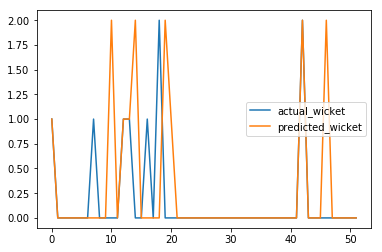

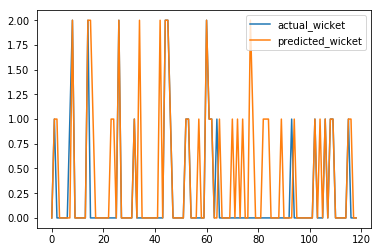

train_accuracy
0.798319327731
test_accuracy
0.846153846154


In [287]:
processed_df = df_final.copy()
le = preprocessing.LabelEncoder()
processed_df.team = le.fit_transform(processed_df.team)
processed_df.venue = le.fit_transform(processed_df.venue)

X = processed_df.drop(['range1'], axis=1).values
y = processed_df['range1'].values

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.3)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
nb = GaussianNB()
rfr = RandomForestClassifier(n_estimators = 200,max_depth=25)
dr = DecisionTreeClassifier(max_depth=10)
reg=linear_model.LinearRegression()
rfr.fit(X_train,y_train)

plt.plot(rfr.predict(X_test))
pr = rfr.predict(X_test)
plt.plot(y_test)
plt.legend(['actual_wicket','predicted_wicket'])
plt.show()
plt.plot(rfr.predict(X_train))
prt = rfr.predict(X_train)
plt.plot(y_train)
plt.legend(['actual_wicket','predicted_wicket'])
plt.show()
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,pr)
score_train = accuracy_score(y_train,prt)
print('train_accuracy')
print(score_train)
print('test_accuracy')
print(score)